<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Материалы" data-toc-modified-id="Материалы-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Материалы</a></span></li><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Поиск клиентов телеком-компании «Нупозвони» с неоптимальными тарифами

## Материалы

Дашборд - https://public.tableau.com/app/profile/natalys/viz/Final_project_16541114635600/Dashboard1?publish=yes

Данные для менеджеров из коммерческого департамента - https://drive.google.com/file/d/1cwjn0wpWuEn8tm0R8dKlaclAnPjNNtVf/view?usp=sharing

## Описание проекта

Цель проекта – провести мониторинг клиентов, которые экономически неэффективно используют услуги на своих тарифах, и могут снизить свои расходы, если перейдут на другие тарифы. 

Заказчиком является коммерческий директор, который хочет увеличить свою прибыль за счет снижения оттока клиентов, переведя их на более выгодный для них тариф. Таким образом, во-первых, необходимо подготовить отчет Заказчику и предоставить данные, которые показывают сколько клиент тратил денег до перехода на новый тариф, сколько будет тратить при переходе на него, какой будет при этом потеря выручки Заказчиком, а также предложить пути решения проблемы потери выручки. Во-вторых, необходимо подготовить отчет с данными по клиентам, использующим неоптимально свой тариф, для менеджеров из коммерческого департамента, которые будут звонить этим клиентам и предлагать новый тариф.


Задачи:
1.	изучить динамику работы клиентов Телекома и выделить активных клиентов, по которым будем проводить все расчеты

2.	изучить текущую выручку компании (в разрезе месяца), а также динамику за весь период, включая изучение среднего чека в разрезе тарифа

3.	определить клиентов, которые неэффективно используют услуги Телекома (платят больше, чем могли бы платить на другом тарифе)

4.	изучить потери в выручке, если все клиенты перейдут на выгодные тарифы

5.	предложить пути решения проблемы потери выручки


## Изучение данных из файла

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
# Откроем файл с данными и изучим общую информацию
telecom_dataset = pd.read_csv('/datasets/telecom_dataset.csv')
telecom_clients = pd.read_csv('/datasets/telecom_clients.csv')
display(telecom_dataset.head())
display(telecom_dataset.info())
display(telecom_clients.head())
display(telecom_clients.info())

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


None

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


None

**Вывод:**
1. Имеется несоответствие типов данных хранимым в них значениях. Необходимо привести столбцы date и date_start к формату времени, столбец internal к булевскому типу, столбец operator_id к int.
2. Имеются пропуски в столбце operator_id.
3. Имеются пропуски в столбце internal, однако, их менее 1% и, вероятно,не внесли данные из-за того, что они не True. Поэтому заменим их на False  во время изменения типа данных на булевский.

## Предобработка данных

In [3]:
# Исследуем соответствие типов, приведем к нужным при необходимости
telecom_dataset['date'] = pd.to_datetime(telecom_dataset['date']).dt.date
telecom_clients['date_start'] = pd.to_datetime(telecom_clients['date_start']).dt.date
telecom_dataset['internal'] = telecom_dataset['internal'].astype('bool')

In [4]:
# Найдем минимальную и максимальную даты
display(telecom_dataset['date'].max())
display(telecom_dataset['date'].min())

datetime.date(2019, 11, 28)

datetime.date(2019, 8, 2)

In [5]:
# Проверим наличие пропусков
display(telecom_dataset.isna().sum())
display(telecom_dataset[telecom_dataset.isna().any(1)])
display(telecom_dataset[telecom_dataset.isna().any(1)]['is_missed_call'].value_counts())
display(telecom_dataset[telecom_dataset.isna().any(1)]['direction'].value_counts())
display(telecom_dataset[telecom_dataset.isna().any(1)]['internal'].value_counts())
display(telecom_dataset[telecom_dataset.isna().any(1)]['user_id'].value_counts())

user_id                   0
date                      0
direction                 0
internal                  0
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04,in,False,NaN,True,2,0,4
7,166377,2019-08-05,in,False,NaN,True,6,0,35
9,166377,2019-08-06,in,False,NaN,True,4,0,62
17,166377,2019-08-07,in,False,NaN,True,2,0,24
27,166377,2019-08-12,in,False,NaN,True,2,0,34
...,...,...,...,...,...,...,...,...,...
53876,168601,2019-11-27,in,False,NaN,True,2,0,39
53880,168601,2019-11-28,in,False,NaN,True,1,0,19
53889,168603,2019-11-28,in,False,NaN,True,1,0,30
53893,168606,2019-11-08,in,False,NaN,True,6,0,121


True     8050
False     122
Name: is_missed_call, dtype: int64

in     7972
out     200
Name: direction, dtype: int64

False    7760
True      412
Name: internal, dtype: int64

168252    145
166405    122
166582    118
166782    117
166658    111
         ... 
167113      1
167183      1
168578      1
166554      1
167139      1
Name: user_id, Length: 305, dtype: int64

Вывод: всего 7456 пропущенных значений в колонке 'operator_id'. В основном (в 95% случаев), эти пропущенные значения среди пропущенных вызовов,среди входящих вызовов, среди внешних вызовов. Можно предположить, что это пропущенные входящие звонки, на которые не был назначен оператор ввиду отсутствия свободных операторов. Поэтому заменять эти пропуски на что-либо будет некорректно, исключим их из исследования. 305 клиентов(41%) имеют пропуски в столбце 'operator_id', поэтому удалять целого клиента некорректно.

In [6]:
telecom_dataset = telecom_dataset.query("operator_id == operator_id")
display(telecom_dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45730 entries, 1 to 53900
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              45730 non-null  int64  
 1   date                 45730 non-null  object 
 2   direction            45730 non-null  object 
 3   internal             45730 non-null  bool   
 4   operator_id          45730 non-null  float64
 5   is_missed_call       45730 non-null  bool   
 6   calls_count          45730 non-null  int64  
 7   call_duration        45730 non-null  int64  
 8   total_call_duration  45730 non-null  int64  
dtypes: bool(2), float64(1), int64(4), object(2)
memory usage: 2.9+ MB


None

In [7]:
# Проверим наличие явных дубликатов
display(telecom_dataset.duplicated().sum())
display(telecom_clients.duplicated().sum())

4184

0

In [8]:
# Удалим явные дубликаты
telecom_dataset = telecom_dataset.drop_duplicates().reset_index(drop=True)
display(telecom_dataset.info())
display(telecom_dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41546 entries, 0 to 41545
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              41546 non-null  int64  
 1   date                 41546 non-null  object 
 2   direction            41546 non-null  object 
 3   internal             41546 non-null  bool   
 4   operator_id          41546 non-null  float64
 5   is_missed_call       41546 non-null  bool   
 6   calls_count          41546 non-null  int64  
 7   call_duration        41546 non-null  int64  
 8   total_call_duration  41546 non-null  int64  
dtypes: bool(2), float64(1), int64(4), object(2)
memory usage: 2.3+ MB


None

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-05,out,True,880022.0,True,3,0,5
1,166377,2019-08-05,out,True,880020.0,True,1,0,1
2,166377,2019-08-05,out,True,880020.0,False,1,10,18
3,166377,2019-08-05,out,False,880022.0,True,3,0,25
4,166377,2019-08-05,out,False,880020.0,False,2,3,29


In [9]:
# Приведем тип данных столбца operator_id к int
telecom_dataset['operator_id'] = telecom_dataset['operator_id'].astype('int')

In [10]:
# Объединим две таблицы через 'inner', чтобы отбросить неактивных клиентов из второй таблицы, для которых нет данных в первой
data_final = telecom_dataset.merge(telecom_clients, on='user_id',  how='inner')
display(data_final.head())
display(data_final.info())

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
0,166377,2019-08-05,out,True,880022,True,3,0,5,B,2019-08-01
1,166377,2019-08-05,out,True,880020,True,1,0,1,B,2019-08-01
2,166377,2019-08-05,out,True,880020,False,1,10,18,B,2019-08-01
3,166377,2019-08-05,out,False,880022,True,3,0,25,B,2019-08-01
4,166377,2019-08-05,out,False,880020,False,2,3,29,B,2019-08-01


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41546 entries, 0 to 41545
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              41546 non-null  int64 
 1   date                 41546 non-null  object
 2   direction            41546 non-null  object
 3   internal             41546 non-null  bool  
 4   operator_id          41546 non-null  int64 
 5   is_missed_call       41546 non-null  bool  
 6   calls_count          41546 non-null  int64 
 7   call_duration        41546 non-null  int64 
 8   total_call_duration  41546 non-null  int64 
 9   tariff_plan          41546 non-null  object
 10  date_start           41546 non-null  object
dtypes: bool(2), int64(5), object(4)
memory usage: 3.2+ MB


None

In [11]:
# Вынесем столбец по месяцам отдельно 
data_final['month_year'] = data_final['date'].astype('datetime64[M]')
data_final['month'] = pd.to_datetime(data_final['date']).dt.month
display(data_final.head())

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,month_year,month
0,166377,2019-08-05,out,True,880022,True,3,0,5,B,2019-08-01,2019-08-01,8
1,166377,2019-08-05,out,True,880020,True,1,0,1,B,2019-08-01,2019-08-01,8
2,166377,2019-08-05,out,True,880020,False,1,10,18,B,2019-08-01,2019-08-01,8
3,166377,2019-08-05,out,False,880022,True,3,0,25,B,2019-08-01,2019-08-01,8
4,166377,2019-08-05,out,False,880020,False,2,3,29,B,2019-08-01,2019-08-01,8


In [12]:
# Предположим, что у оператора 8-часовой рабочий день (28 800сек) - т.е. сверх этого времени не мб продолжительность звонков в этот день
# Сгруппируем данные по дням и операторам, посчитаем суммарно продолжительность звонков и количество звонков
time = 8*60*60
data_final_operator = data_final.groupby(['operator_id', 'date', 'month']).agg({'total_call_duration': 'sum', 'calls_count': 'sum'}).reset_index()
display((data_final_operator['total_call_duration'].max()))
display((data_final_operator[data_final_operator['total_call_duration'] > time]).sort_values(by='total_call_duration', ascending = False).head(10))

189989

,operator_id,date,month,total_call_duration,calls_count
847,885876,2019-09-25,9,189989,2039
848,885876,2019-09-26,9,172165,1603
831,885876,2019-09-09,9,160826,1700
840,885876,2019-09-18,9,159178,1638
854,885876,2019-10-02,10,155402,1570
834,885876,2019-09-12,9,153793,1104
845,885876,2019-09-23,9,153313,2186
839,885876,2019-09-17,9,150486,2206
853,885876,2019-10-01,10,150203,2767
849,885876,2019-09-27,9,149680,1487


**Вывод:** выявлены аномальные операторы (0,8%), у которых продолжительность звонков больше рабочего времени, а также большое количество самих звонков, вероятно, под одной учетной записью работали несколько операторов. Удалять эти записи не будем, чтобы не исказить результаты работы, тем более, процент аномальных операторов невелик.

In [13]:
# Напишем функцию для построения гистограмм распределения продолжительности звонков, количества звонков, распределения по месяцам
def create_hist(column, title, xlabel, ylabel, x, y):
    data_final[column].hist(bins=100, range = (x, y))
    display(data_final[column].mean())
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

1321.5928127858278

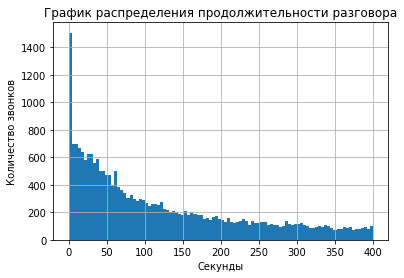

16.90042362682328

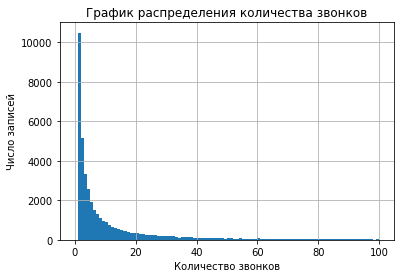

10.210995041640592

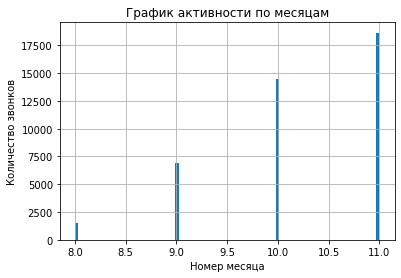

In [14]:
create_hist('total_call_duration', 'График распределения продолжительности разговора', 'Секунды', 'Количество звонков',  0, 400)
create_hist('calls_count', 'График распределения количества звонков', 'Количество звонков', 'Число записей', 0, 100)
create_hist('month', 'График активности по месяцам', 'Номер месяца', 'Количество звонков', 8, 11)

,operator_id,date,calls_count
13774,929428,2019-11-11,5022
853,885876,2019-10-01,2767
13767,929428,2019-10-31,2730
846,885876,2019-09-24,2325
839,885876,2019-09-17,2206
845,885876,2019-09-23,2186
970,885890,2019-10-21,2148
847,885876,2019-09-25,2039
13271,925922,2019-10-22,2018
825,885876,2019-09-03,1897


,calls_count
operator_id,
879896,18.600000
879898,87.059524
880020,3.214286
880022,4.690476
880026,28.987013


calls_count    1.0
dtype: float64

calls_count    834.208333
dtype: float64

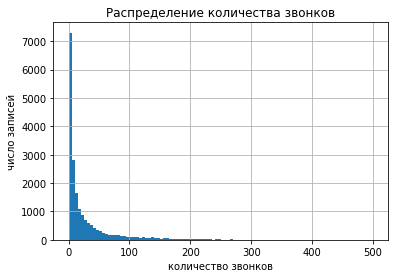

In [15]:
# Посмотрим, сколько звонков приходится на одного оператора
calls_oper = data_final.groupby(['operator_id', 'date']).agg({'calls_count': 'sum'}).reset_index().sort_values(by = 'calls_count', ascending = False)
display(calls_oper.head(10))
calls_oper['calls_count'].hist(bins = 100, range = (0, 500))
plt.title('Распределение количества звонков')
plt.xlabel('количество звонков')
plt.ylabel('число записей')
display(calls_oper.groupby('operator_id').agg({'calls_count': 'mean'}).head())
display(calls_oper.groupby('operator_id').agg({'calls_count': 'mean'}).min())
display(calls_oper.groupby('operator_id').agg({'calls_count': 'mean'}).max())

Вывод: в среднем, от 1 до 834 звонков приходится на одного оператора в день.

In [16]:
# Посмотрим, сколько секунд приходится в среднем на оператора в день
calls = data_final.groupby(['operator_id', 'date']).agg({'total_call_duration': 'sum'}).reset_index().sort_values(by = 'total_call_duration', ascending = False)
display(calls.head(10))
display(calls.groupby('operator_id').agg({'total_call_duration': 'mean'}).head(10))
display(calls.groupby('operator_id').agg({'total_call_duration': 'mean'}).min())
display(calls.groupby('operator_id').agg({'total_call_duration': 'mean'}).max())

,operator_id,date,total_call_duration
847,885876,2019-09-25,189989
848,885876,2019-09-26,172165
831,885876,2019-09-09,160826
840,885876,2019-09-18,159178
854,885876,2019-10-02,155402
834,885876,2019-09-12,153793
845,885876,2019-09-23,153313
839,885876,2019-09-17,150486
853,885876,2019-10-01,150203
849,885876,2019-09-27,149680


,total_call_duration
operator_id,
879896,1522.740000
879898,4301.047619
880020,180.357143
880022,450.595238
880026,2279.558442
880028,2426.410256
880240,630.857143
881278,108.600000
882476,95.666667


total_call_duration    0.0
dtype: float64

total_call_duration    59797.4
dtype: float64

Вывод: в среднем, от 0 до 59797 секунд приходится на одного оператора в день. Дальше проверим эту информацию на наличие выбросов.

**Вывод:** На графиках распределения продолжительности звонков и количества звонков представлено распределение Пуассона. Пик у нуля и единицы соответственно, вероятно, связан с тем, что было много единичных пропущенных звонков.

**Определим активных клиентов исходя из полученных данных:**
1. те, кто совершал звонки в ноябре
2. те, у кого более одного звонка
3. те, у кого продолжительность разговора больше 0

In [17]:
# Сгруппируем данные по клиентам
data_final_client = data_final.groupby(['user_id', 'month', 'internal', 'tariff_plan', 'direction']).agg({'total_call_duration': 'sum', 'calls_count': 'sum', 'operator_id': 'nunique'}).reset_index()
display(data_final_client.head())
display(data_final_client.info())

,user_id,month,internal,tariff_plan,direction,total_call_duration,calls_count,operator_id
0,166377,8,False,B,in,1441,15,3
1,166377,8,False,B,out,78029,912,5
2,166377,8,True,B,out,96,19,5
3,166377,9,False,B,in,1590,23,3
4,166377,9,False,B,out,105835,1393,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1527 entries, 0 to 1526
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              1527 non-null   int64 
 1   month                1527 non-null   int64 
 2   internal             1527 non-null   bool  
 3   tariff_plan          1527 non-null   object
 4   direction            1527 non-null   object
 5   total_call_duration  1527 non-null   int64 
 6   calls_count          1527 non-null   int64 
 7   operator_id          1527 non-null   int64 
dtypes: bool(1), int64(5), object(2)
memory usage: 85.1+ KB


None

In [18]:
# Отфильтруем активных клиентов, по которым будем проводить дальнейшее исследование
data_final_client = data_final_client[(data_final_client['month'] == 11) & (data_final_client['calls_count'] > 1) & (data_final_client['total_call_duration'] > 0)]
display(data_final_client.head())
display(data_final_client.info())

,user_id,month,internal,tariff_plan,direction,total_call_duration,calls_count,operator_id
9,166377,11,False,B,in,2774,35,3
10,166377,11,False,B,out,95383,1245,4
11,166377,11,True,B,out,127,16,4
20,166392,11,False,C,in,9430,43,2
32,166405,11,False,B,in,87800,585,8


<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 9 to 1526
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              461 non-null    int64 
 1   month                461 non-null    int64 
 2   internal             461 non-null    bool  
 3   tariff_plan          461 non-null    object
 4   direction            461 non-null    object
 5   total_call_duration  461 non-null    int64 
 6   calls_count          461 non-null    int64 
 7   operator_id          461 non-null    int64 
dtypes: bool(1), int64(5), object(2)
memory usage: 29.3+ KB


None

In [19]:
# Переведем секунды total_call_duration в минуты для удобства дальнейших расчетов
data_final_client['total_call_duration'] = data_final_client['total_call_duration']/60
display(data_final_client.head())

,user_id,month,internal,tariff_plan,direction,total_call_duration,calls_count,operator_id
9,166377,11,False,B,in,46.233333,35,3
10,166377,11,False,B,out,1589.716667,1245,4
11,166377,11,True,B,out,2.116667,16,4
20,166392,11,False,C,in,157.166667,43,2
32,166405,11,False,B,in,1463.333333,585,8


In [20]:
# Выявим клиентов, у которых внутренние звонки более 2000мин
display((data_final_client[(data_final_client['internal'] == True) & data_final_client['total_call_duration']>2000]).info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              0 non-null      int64  
 1   month                0 non-null      int64  
 2   internal             0 non-null      bool   
 3   tariff_plan          0 non-null      object 
 4   direction            0 non-null      object 
 5   total_call_duration  0 non-null      float64
 6   calls_count          0 non-null      int64  
 7   operator_id          0 non-null      int64  
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 0.0+ bytes


None

Вывод: В нашей выборке активных клиентов не выявлена продолжительность исходящих звонков внутри сети более 2000 мин.

In [21]:
# Сгруппируем данные по паре клиент-оператор
data_operators = data_final.groupby('user_id').agg({'operator_id': 'nunique'}).reset_index()
display(data_operators.head())

,user_id,operator_id
0,166377,5
1,166391,2
2,166392,3
3,166399,1
4,166405,10


In [22]:
# ячейка тимлида
data_final.query('user_id == 166377').operator_id.nunique()

5

**Вывод:**
1. Данные для исследования предоставлены за период с 02.08.2019г по 28.11.2019г.
2. Всего 7456 пропущенных значений в колонке 'operator_id'. В основном (в 95% случаев), эти пропущенные значения среди пропущенных вызовов,среди входящих вызовов, среди внешних вызовов. Можно предположить, что это пропущенные входящие звонки, на которые не был назначен оператор ввиду отсутствия свободных операторов. Поэтому заменять эти пропуски на что-либо будет некорректно, исключим их из исследования. 305 клиентов(41%) имеют пропуски в столбце 'operator_id', поэтому удалять целого клиента некорректно.
3. Определили активных клиентов (те, кто совершал звонки в ноябре, у кого более одного звонка и у кого продолжительность разговора больше 0), отфильтровали по ним данные.
4. Выявили, что в нашей выборке активных клиентов не выявлена продолжительность исходящих звонков внутри сети более 2000 мин (таким образом, тарификация исходящих звонков внутри сети в дальнейших расчетах не будет учитываться).

## Исследовательский анализ данных

Text(0.5, 1.0, 'Распределение тарифных планов во времени по количеству клиентов')

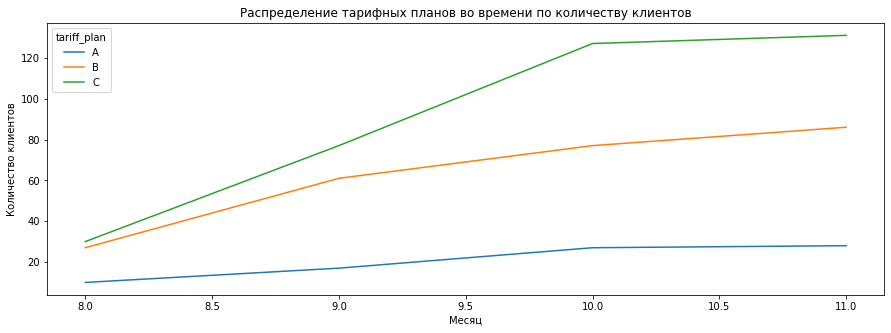

In [23]:
#Построим распределение по количеству клиентов тарифных планов по месяцам
data_final.pivot_table(index = 'month', columns = 'tariff_plan', values = 'user_id', aggfunc = 'nunique' ).plot(figsize=(15,5))
plt.xlabel('Месяц')
plt.ylabel('Количество клиентов')
plt.title('Распределение тарифных планов во времени по количеству клиентов')

Text(0.5, 1.0, 'Распределение тарифных планов во времени по количеству опреаторов')

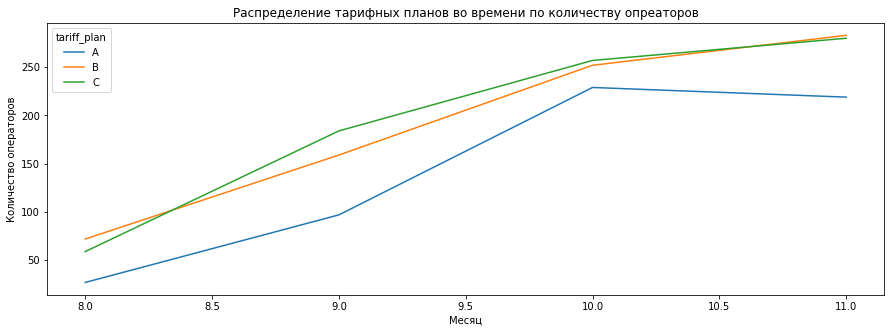

In [24]:
#Построим распределение по количеству операторов в тарифных планов по месяцам
data_final.pivot_table(index = 'month', columns = 'tariff_plan', values = 'operator_id', aggfunc = 'nunique' ).plot(figsize=(15,5))
plt.xlabel('Месяц')
plt.ylabel('Количество операторов')
plt.title('Распределение тарифных планов во времени по количеству опреаторов')

Text(0.5, 1.0, 'Распределение тарифных планов во времени по количеству звонков')

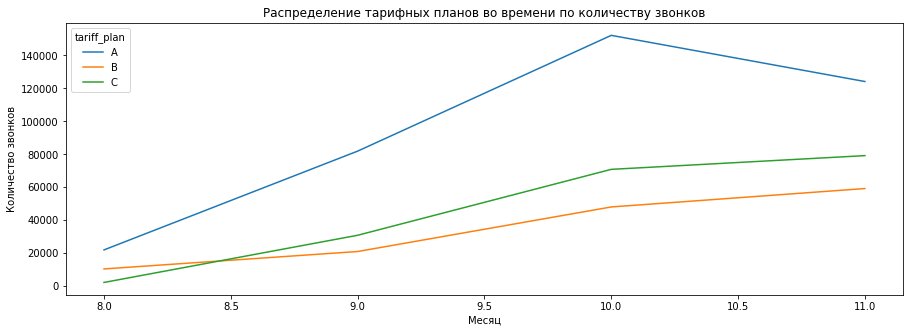

In [25]:
#Построим распределение звонков в тарифных планов по месяцам
data_final.pivot_table(index = 'month', columns = 'tariff_plan', values = 'calls_count', aggfunc = 'sum' ).plot(figsize=(15,5))
plt.xlabel('Месяц')
plt.ylabel('Количество звонков')
plt.title('Распределение тарифных планов во времени по количеству звонков')

Вывод: 
1. при изучении распределения количества клиентов тарифных планов по месяцам мы видим, что больше всего клиентов тарифного плана С, меньше всего - тарифного плана А, рост клиентов на всех тарифах замедляется.
2. при изучении распределения количества операторов мы видим рост на тарифных планах В и С, тогда как на тарифном плане А идет снижение.
3. при изучении распределения количества звонков мы видим, что на тарифном плане А к ноябрю их становится меньше (больше всего было в октябре), на тарифных планах В и С количество звонков медленно увеличивается.

In [26]:
# Посмотрим на средние показатели активных пользователей тарифов
display((data_final_client[data_final_client['tariff_plan'] == 'A']).mean())
display((data_final_client[data_final_client['tariff_plan'] == 'B']).mean())
display((data_final_client[data_final_client['tariff_plan'] == 'C']).mean())

user_id                167557.573529
month                      11.000000
internal                    0.279412
total_call_duration      2309.360539
calls_count              1825.514706
operator_id                 7.411765
dtype: float64

user_id                167396.833333
month                      11.000000
internal                    0.166667
total_call_duration       512.814980
calls_count               352.130952
operator_id                 2.970238
dtype: float64

user_id                167510.560000
month                      11.000000
internal                    0.173333
total_call_duration       384.298148
calls_count               351.364444
operator_id                 2.120000
dtype: float64

In [27]:
# Напишем функцию для определения выручки от клиентов разных тарифов
def tariffs(data, tariff, fee, k, k_internal, k_oper=100, internal_limit=2000, display_info=True):
    # Отфильтруем клиентов с тарифом 
    data = data[data['tariff_plan'] == tariff]
    # Сгруппируем данные по клиентам
    data = data.groupby(['user_id', 'internal', 'direction']).agg({'total_call_duration': 'sum'}).reset_index()

    # Оставим только исходящие вызовы
    data = data[data['direction'] == 'out']
    
    # Пересчитаем внутренние исходящие вызовы с учетом бесплатного лимита    
    data['total_call_duration'] = np.where(
        data['internal'] == True,
        np.where(data['total_call_duration'] < internal_limit, 0, data['total_call_duration'] - internal_limit),
        data['total_call_duration'])
    
    # Посчитаем для тарифа частично выручку
    data['income_without_oper'] = data['total_call_duration'] * np.where(data['internal'] == True, k_internal, k)
    # Сгруппируем данные по клиентам
    data = data.groupby(['user_id']).agg({'income_without_oper': 'sum'}).reset_index()
    #Добавим абонентскую плату
    data['income_without_oper'] += fee
    # Объединим таблицы, прибавив столбец с операторами
    data = data.merge(data_operators, on='user_id',  how='inner')
    # Посчитаем для тарифа А полную выручку
    data['income'] = data['income_without_oper'] + data['operator_id'] * k_oper
    if display_info:
        display(f'Данные по пользователям тарифа {tariff}',  data.head())
    return data

In [28]:
data_A = tariffs(data_final_client, 'A', 5000, 0.4, 0.1)

'Данные по пользователям тарифа A'

,user_id,income_without_oper,operator_id,income
0,166407,5049.300000,8,5849.300000
1,166541,5053.473333,4,5453.473333
2,166582,5618.453333,3,5918.453333
3,166713,5001.100000,2,5201.100000
4,166725,5199.193333,1,5299.193333


In [29]:
# Посмотрим, сколько всего клиентов тарифа А
data_A['user_id'].count()

23

In [30]:
data_B = tariffs(data_final_client, 'B', 2000, 0.5, 0.15)

'Данные по пользователям тарифа B'

,user_id,income_without_oper,operator_id,income
0,166377,2794.858333,5,3294.858333
1,166405,5390.216667,10,6390.216667
2,166406,2394.116667,3,2694.116667
3,166485,3672.591667,6,4272.591667
4,166495,2237.308333,2,2437.308333


In [31]:
# Посмотрим, сколько всего клиентов тарифа B
data_B['user_id'].count()

66

In [32]:
data_C = tariffs(data_final_client, 'C', 1000, 0.7, 0.3)

'Данные по пользователям тарифа C'

,user_id,income_without_oper,operator_id,income
0,166487,1079.590000,1,1179.590000
1,166511,2910.615000,3,3210.615000
2,166520,1853.463333,18,3653.463333
3,166604,1020.906667,3,1320.906667
4,166619,1013.253333,1,1113.253333


In [33]:
# Посмотрим, сколько всего клиентов тарифа C
data_C['user_id'].count()

75

In [34]:
# Посмотрим, сколько клиенты тарифа A платили, если б были на тарифе B, переплачивают ли они сейчас

data_A['if_B'] = tariffs(data_final_client, 'A', 2000, 0.5, 0.15, display_info=False)['income']
data_A['over_B'] = data_A['income'] - data_A['if_B']
display("Количество переплачивающих клиентов:", (data_A[data_A['over_B'] > 0])['user_id'].count())
display((data_A[data_A['over_B'] > 0]).head())

'Количество переплачивающих клиентов:'

22

,user_id,income_without_oper,operator_id,income,if_B,over_B
0,166407,5049.300000,8,5849.300000,2861.625000,2987.675000
1,166541,5053.473333,4,5453.473333,2466.841667,2986.631667
2,166582,5618.453333,3,5918.453333,3073.066667,2845.386667
3,166713,5001.100000,2,5201.100000,2201.375000,2999.725000
4,166725,5199.193333,1,5299.193333,2348.991667,2950.201667


In [35]:
# Посмотрим, сколько клиенты тарифа A платили, если б были на тарифе C, переплачивают ли они сейчас
data_A['if_C'] = tariffs(data_final_client, 'A', 1000, 0.7, 0.3, display_info=False)['income']
data_A['over_C'] = data_A['income'] - data_A['if_C']
display("Количество переплачивающих клиентов:", (data_A[data_A['over_C'] > 0])['user_id'].count())
display((data_A[data_A['over_C'] > 0]).head())

'Количество переплачивающих клиентов:'

21

,user_id,income_without_oper,operator_id,income,if_B,over_B,if_C,over_C
0,166407,5049.300000,8,5849.300000,2861.625000,2987.675000,1886.275000,3963.025
1,166541,5053.473333,4,5453.473333,2466.841667,2986.631667,1493.578333,3959.895
2,166582,5618.453333,3,5918.453333,3073.066667,2845.386667,2382.293333,3536.160
3,166713,5001.100000,2,5201.100000,2201.375000,2999.725000,1201.925000,3999.175
4,166725,5199.193333,1,5299.193333,2348.991667,2950.201667,1448.588333,3850.605


In [36]:
# Проверим, совпадают ли клиенты, неоптимально использующие тариф А, в списках, предлагающих тариф В и С
ac = list(data_A[data_A['over_C'] > 0]['user_id'])
ab = list(data_A[data_A['over_B'] > 0]['user_id'])
optimal_ac = [x for x in ac if x in ab]
display(len(optimal_ac))

optimal_ab = [x for x in ab if x not in ac]
display(len(optimal_ab))

21

1

In [37]:
# Посчитаем потери Заказчика, если клиенты перейдут на более оптимальный тариф
display(data_A.query('user_id in @optimal_ac')['over_C'].sum() + data_A.query('user_id in @optimal_ab')['over_B'].sum())

75703.36333333334

In [38]:
# Посчитаем выручку сейчас
data_A['income'].sum()

187789.37999999998

In [39]:
# Посмотрим, сколько клиенты тарифа В платили, если б были на тарифе А, переплачивают ли они сейчас
data_B['if_A'] = tariffs(data_final_client, 'B', 5000, 0.4, 0.1, display_info=False)['income']
data_B['over_A'] = data_B['income'] - data_B['if_A']
display("Количество переплачивающих клиентов:", (data_B[data_B['over_A'] > 0])['user_id'].count())

'Количество переплачивающих клиентов:'

0

In [40]:
# Посмотрим, сколько клиенты тарифа В платили, если б были на тарифе С, переплачивают ли они сейчас
data_B['if_C'] = tariffs(data_final_client, 'B', 1000, 0.7, 0.3, display_info=False)['income']
data_B['over_C'] = data_B['income'] - data_B['if_C']
bc = data_B[data_B['over_C'] > 0]
display("Количество переплачивающих клиентов:", bc['user_id'].count())

optimal_bc = list(bc['user_id'])
display(bc.head())

'Количество переплачивающих клиентов:'

64

,user_id,income_without_oper,operator_id,income,if_A,over_A,if_C,over_C
0,166377,2794.858333,5,3294.858333,6135.886667,-2841.028333,2612.801667,682.056667
2,166406,2394.116667,3,2694.116667,5615.293333,-2921.176667,1851.763333,842.353333
3,166485,3672.591667,6,4272.591667,6938.073333,-2665.481667,3941.628333,330.963333
4,166495,2237.308333,2,2437.308333,5389.846667,-2952.538333,1532.231667,905.076667
5,166503,2060.216667,6,2660.216667,5648.173333,-2987.956667,1684.303333,975.913333


In [41]:
# Посчитаем потери Заказчика, если клиенты перейдут на более оптимальный тариф
display(bc['over_C'].sum())

56077.16

In [42]:
# Посчитаем выручку сейчас
data_B['income'].sum()

191580.45833333334

In [43]:
# Посмотрим, сколько клиенты тарифа C платили, если б были на тарифе А, переплачивают ли они сейчас
data_C['if_A'] = tariffs(data_final_client, 'C', 5000, 0.4, 0.1, display_info=False)['income']
data_C['over_A'] = data_C['income'] - data_C['if_A']
display("Количество переплачивающих клиентов:",(data_C[data_C['over_A'] > 0])['user_id'].count())

'Количество переплачивающих клиентов:'

0

In [44]:
# Посмотрим, сколько клиенты тарифа C платили, если б были на тарифе В, переплачивают ли они сейчас
data_C['if_B'] = tariffs(data_final_client, 'C', 2000, 0.5, 0.15, display_info=False)['income']
data_C['over_B'] = data_C['income'] - data_C['if_B']
cb = data_C[data_C['over_B'] > 0]
display("Количество переплачивающих клиентов:",cb['user_id'].count())
optimal_cb = list(cb['user_id'])
display(cb)

'Количество переплачивающих клиентов:'

1

,user_id,income_without_oper,operator_id,income,if_A,over_A,if_B,over_B
51,167827,7748.42,3,8048.42,9156.24,-1107.82,7120.3,928.12


In [45]:
# Посчитаем выручку сейчас
data_C['income'].sum()

138609.905

In [46]:
# Посчитаем выручку сейчас
data_A['income'].sum() + data_B['income'].sum() + data_C['income'].sum()

517979.7433333333

**Вывод:**
1. При изучении данных в динамике мы видим, что больше всего клиентов на тарифном плане С, меньше всего - на тарифном плане А, рост клиентов на всех тарифах замедляется, также мы видим рост количества операторов на тарифных планах В и С, тогда как на тарифном плане А идет снижение, при изучении распределения количества звонков мы видим, что на тарифном плане А к ноябрю их становится меньше (больше всего было в октябре), на тарифных планах В и С количество звонков медленно увеличивается.
2. Активные пользователи тарифа А, в среднем, тратят 2309 мин/мес, совершают 1825 звонков, используют 7 операторов, активные пользователи тарифа В - 512, 352 и 2 соответственно, активные пользователи тарифа С - 384, 351 и 2 соответственно.
3. На тарифе А среди 23 клиентов переплачивают 22 клиента, сэкономят, если перейдут на более дешевые тарифы(21 клиент на тариф С и 1 клиент на тариф В). При этом убыток компании составит 75 703 руб в месяц.
4. На тарифе В среди 66 клиентов переплачивают 64 клиента, сэкономят, если перейдут на более дешевый тариф С. При этом убыток компании составит 56 077 руб в месяц.
5. На тарифе С среди 75 клиентов переплачивает 1 клиент, сэкономит, если перейдет на более дорогой тариф В. При этом убыток компании составит 928руб в месяц.
6. Таким образом, среди тех, кто переплачивает (86 клиентов) в настоящее время, почти все (85 клиентов) сэкономят, если перейдут на более дешевые тарифы, при этом убыток компании составит 116 214 руб в месяц. Лишь 1 клиент сэкономит, если перейдет на более дорогой тариф, при этом убыток компании составит 928руб в месяц. Если все клиенты перейдут на более оптимальные для них тарифы, то убыток компании составит 132 708 руб в месяц при выручке сейчас 517 979 руб в месяц (25,6%).

## Проверка гипотез

Для проверки гипотез используем t-тест, т.к. у нас достаточно большие выборки (более 30 элементов) и нормальным распределением можно пренебречь, потому что выборочное среднее будет распределено нормально в любом случае. Определим критический уровень  alpha = 0.05 с допустимым уровнем ошибки в 5%.

Нулевая гипотеза 1: Средняя выручка до перехода на оптимальный тариф и после одинаковая.

Альтернативная гипотеза 1: Средняя выручка до перехода на оптимальный тариф и после различается.



In [47]:
# создадим сводную таблицу выручки на всех тарифах
data_total = data_A.append(data_B).append(data_C)[['user_id','income']]

# создадим таблицу выручки на тарифе А, если все клиенты перейдут на оптимальный тариф
data_optimal_a = data_A.query('(user_id not in @optimal_ab) and (user_id not in @optimal_ac)')[['user_id','income']]
data_optimal_a = data_optimal_a.append(data_A.query('user_id in @optimal_ab')[['user_id','if_B']].rename(columns = {'if_B':'income'}))
data_optimal_a = data_optimal_a.append(data_A.query('user_id in @optimal_ac')[['user_id','if_C']].rename(columns = {'if_C':'income'}))

# создадим таблицу выручки на тарифе В, если все клиенты перейдут на оптимальный тариф
data_optimal_b = data_B.query('(user_id not in @optimal_bc)')[['user_id','income']]
data_optimal_b = data_optimal_b.append(data_B.query('user_id in @optimal_bc')[['user_id','if_C']].rename(columns = {'if_C':'income'}))

# создадим таблицу выручки на тарифе С, если все клиенты перейдут на оптимальный тариф
data_optimal_c = data_C.query('(user_id not in @optimal_cb)')[['user_id','income']]
data_optimal_c = data_optimal_c.append(data_C.query('user_id in @optimal_cb')[['user_id','if_B']].rename(columns = {'if_B':'income'}))

# создадим сведную таблицу выручки на оптимальных тарифах
optimal_total = data_optimal_a.append(data_optimal_b).append(data_optimal_c)

In [48]:
# Посчитаем 95-й и 99-й перцентили выручки, чтобы определить выбросы
display(np.percentile(data_total['income'], [95, 99])) 
display(np.percentile(optimal_total['income'], [95, 99])) 
# Отфильтруем клиентов с выручкой более 10399 в data_total и более 9328 в optimal_total (тк их 1%)
data_total = data_total[data_total['income'] < (np.percentile(data_total['income'], [99]))[0]]
optimal_total = optimal_total[optimal_total['income'] < (np.percentile(optimal_total['income'], [99]))[0]]

array([ 6503.46783333, 14038.32166667])

array([ 5348.4695    , 12857.17178333])

In [49]:
alpha = .05
results = st.ttest_ind(
    data_total['income'], 
    optimal_total['income'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  6.176603544079844e-05
Отвергаем нулевую гипотезу


Нулевая гипотеза 2: Средняя выручка от клиентов тарифа А и от клиентов тарифа С одинаковая.

Альтернативная гипотеза 2: Средняя выручка от клиентов тарифа А и от клиентов тарифа С различается.


In [50]:
alpha = .05
results = st.ttest_ind(
    data_A['income'], 
    data_C['income'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  5.797758382370718e-12
Отвергаем нулевую гипотезу


**Вывод:**
1. Имеется статистически значимая разница в средних выручках до перехода на оптимальный тариф и после.
2. Имеется статистически значимая разница в средних выручках от клиентов тарифа А и от клиентов тарифа С.

In [51]:
# Подготовим таблицу с данными о клиентах с неоптимальными тарифами для менеджеров из коммерческого отдела
opt_ab = data_A.query('user_id in @optimal_ab')[['user_id','income','if_B', 'over_B']].rename(columns = {'if_B':'optimal_in',
                                                                                                       'over_B':'over',})
opt_ab['optimal_tariff'] = 'B'
opt_ac = data_A.query('user_id in @optimal_ac')[['user_id','income','if_C', 'over_C']].rename(columns = {'if_C':'optimal_in',
                                                                                                       'over_C':'over',})
opt_ac['optimal_tariff'] = 'C'
opt_a = opt_ab.append(opt_ac)
opt_a['tariff'] = 'A'

opt_bc = data_B.query('user_id in @optimal_bc')[['user_id','income','if_C', 'over_C']].rename(columns = {'if_C':'optimal_in',
                                                                                                          'over_C':'over'})
opt_bc['optimal_tariff'] = 'C'
opt_bc['tariff'] = 'B'

opt_cb = data_C.query('user_id in @optimal_cb')[['user_id','income','if_B', 'over_B']].rename(columns = {'if_B':'optimal_in',
                                                                                                         'over_B':'over',})
opt_cb['optimal_tariff'] = 'B'
opt_cb['tariff'] = 'C'
          
total = opt_a.append(opt_bc).append(opt_cb)
total = total[['user_id', 'tariff', 'income', 'optimal_tariff', 'optimal_in', 'over']]
total = total.rename(columns = {'user_id':'id',
                                'tariff':'текущий тариф',
                                'income':'текущие затраты',
                                'optimal_tariff':'оптимальный тариф',
                                'optimal_in':'оптимальные затраты',
                                'over':'экономия'
                       })
# total.to_csv('optimal.csv', index=False)
display(total)

,id,текущий тариф,текущие затраты,оптимальный тариф,оптимальные затраты,экономия
15,168062,A,14284.546667,B,12930.683333,1353.863333
0,166407,A,5849.300000,C,1886.275000,3963.025000
1,166541,A,5453.473333,C,1493.578333,3959.895000
2,166582,A,5918.453333,C,2382.293333,3536.160000
3,166713,A,5201.100000,C,1201.925000,3999.175000
...,...,...,...,...,...,...
62,168225,B,2714.466667,C,1720.253333,994.213333
63,168307,B,2300.925000,C,1301.295000,999.630000
64,168481,B,2303.541667,C,1304.958333,998.583333
65,168603,B,2109.891667,C,1113.848333,996.043333


## Общий вывод

**В ходе проведенного исследования выяснили:**
1. Данные для исследования предоставлены за период с 02.08.2019г по 28.11.2019г.
2. Определили активных клиентов (те, кто совершал звонки в ноябре, у кого более одного звонка и у кого продолжительность разговора больше 0).
3. Выявили, что в нашей выборке активных клиентов не выявлена продолжительность исходящих звонков внутри сети более 2000 мин (таким образом, тарификация исходящих звонков внутри сети в дальнейших расчетах не будет учитываться).
4. При изучении данных в динамике мы видим, что больше всего клиентов на тарифном плане С, меньше всего - на тарифном плане А, рост клиентов на всех тарифах замедляется, также мы видим рост количества операторов на тарифных планах В и С, тогда как на тарифном плане А идет снижение, при изучении распределения количества звонков мы видим, что на тарифном плане А к ноябрю их становится меньше (больше всего было в октябре), на тарифных планах В и С количество звонков медленно увеличивается.
5. Активные пользователи тарифа А, в среднем, тратят 2309 мин/мес, совершают 1825 звонков, используют 7 операторов, активные пользователи тарифа В - 512, 352 и 2 соответственно, активные пользователи тарифа С - 384, 351 и 2 соответственно.
6.  На тарифе А среди 23 клиентов переплачивают 22 клиента, сэкономят, если перейдут на более дешевые тарифы(21 клиент на тариф С и 1 клиент на тариф В). При этом убыток компании составит 75 703 руб в месяц.
7. На тарифе В среди 66 клиентов переплачивают 64 клиента, сэкономят, если перейдут на более дешевый тариф С. При этом убыток компании составит 56 077 руб в месяц.
8. На тарифе С среди 75 клиентов переплачивает 1 клиент, сэкономит, если перейдет на более дорогой тариф В. При этом убыток компании составит 928руб в месяц.
9. Таким образом, среди тех, кто переплачивает (86 клиентов) в настоящее время, почти все (85 клиентов) сэкономят, если перейдут на более дешевые тарифы, при этом убыток компании составит 116 214 руб в месяц. Лишь 1 клиент сэкономит, если перейдет на более дорогой тариф, при этом убыток компании составит 928руб в месяц. Если все клиенты перейдут на более оптимальные для них тарифы, то убыток компании составит 132 708 руб в месяц при выручке сейчас 517 979 руб в месяц (25,6%).
10. Имеется статистически значимая разница в средних выручках до перехода на оптимальный тариф и после.
11. Имеется статистически значимая разница в средних выручках от клиентов тарифа А и от клиентов тарифа С.

**Рекомендации:**
1. Мы выявили малое количество клиентов тарифа А относительно других тарифов, снижение количества звонков и операторов на нем. В связи с тем, что это самый дорогой тариф, то было бы выгодно привлекать больше клиентов на него (мб стоит рассмотреть более крупные организации в качестве клиентов).
2. Для повышения прибыли можно пересмотреть тарификацию операторов (увеличить ее на тарифах В и С).
3. Можно уменьшить количество бесплатных минут исходящих звонков внутри сети, тк в нашем исследовании никто не превысил настоящий лимит. 